<font color='green' size='6'>Italy </font>
<font color ='red' size='6'>Menu</font>
<br>

## Research Question
#### Generating meal compositions with AI

**Name:** Andrea <br>
**Name:** Emilio <br>
**Name:** Mayya Lihovodov <br>

**Name:** Igal Khalfin <br>
**Name:** Dima Vornov  <br>
**Name:** Adi Zamir    <br>
**Name:** Adir Nisim   <br>
**Name:** Nir Levy    <br>

Starting Date: 24/11/2022


<font color='green' size='5'>
Import Modules (Packages) </font>
<br>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import inf


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


<h1><ins>Data Handling Section </ins></h1>
<br>
* read CSV file <br>
* removing rows where quantity < 0 <br>
 * Adding Columns: <br>
<font color='darkgreen'>
    Price_Before_Discount(full price), <br>
    Earnings (Paid price - cost), <br>
    Margin (Earnings / paid price as precentage % view), <br>
    Unit_Price, <br>
    Sale_Month (for EDA and future purpess), <br>
    Menu Category, mapping category by specifay item name (food/soft drink/alcohol).
</font>

In [17]:
df = pd.read_csv('Query_Sicilia_2021.csv', index_col=0)  

c:\Users\Dima\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
df[df.QUANTITY < 0]

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE
2079,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-1,-1.0,0.0,-0.13,NaN
2080,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,MELANZANE AL POMODORO (C),FOOD,RICETTE FOOD,CONTORNO,-1,-3.9,0.0,-0.31,NaN
2081,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,COCA COLA 33CL TIN,BEVERAGE,ACQUA E SOFT DRINKS,SOFT DRINKS,-1,-3.0,0.0,-0.40,NaN
2082,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,-1,-3.1,0.0,-0.25,NaN
2083,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,GNOCCHI ALLA BOLOGNESE,FOOD,RICETTE FOOD,PRIMO,-1,-4.9,0.0,-0.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335501,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,HAMBURGER ALLA GRIGLIA (C),FOOD,RICETTE FOOD,SECONDO,-1,-8.0,0.0,-0.65,NaN
2335502,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-3,-3.0,0.0,-0.40,NaN
2335859,TENACIA,NAP-TRI,RI,599532021-10-09,20211009,20211009,BAR,TENACIA BAR,71,205011,20.0,VECCHIA ROMAGNA E.N. CL 4,BEVERAGE,RICETTE ALCOLICHE,SUPERALCOLICI LISCI,-1,-4.0,0.0,-0.68,NaN
2336556,TENACIA,NAP-TRI,IR,633972021-10-30,20211030,20211030,SELF,TENACIA Front Desk,16,133936,13.0,BIRRA BECK S 33CL BT,BEVERAGE,BIRRE,BIRRA PAX,-1,-4.5,0.0,-0.65,NaN


In [19]:
positive_quantity_df = df[df['QUANTITY'] > 0].copy()

positive_quantity_df['PRICE_BEFORE_DISCOUNT'] = positive_quantity_df['PRICE_PAID'] + positive_quantity_df['DISCOUNT']
positive_quantity_df['EARNINGS'] = positive_quantity_df['PRICE_PAID'] - positive_quantity_df['COST_OF_SALE']
positive_quantity_df["SALE_MONTH"] = pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).month
positive_quantity_df['MARGIN'] = positive_quantity_df['EARNINGS'] / positive_quantity_df['PRICE_PAID']
positive_quantity_df.loc[positive_quantity_df['MARGIN'] < 0, 'MARGIN'] = 0
positive_quantity_df['MARGIN_RAW'] = positive_quantity_df['MARGIN']
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'] * 100
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'].round(2).astype(str) + '%'
positive_quantity_df['UNIT_PRICE'] = positive_quantity_df['PRICE_PAID'] / positive_quantity_df['QUANTITY']
positive_quantity_df = positive_quantity_df[positive_quantity_df.MARGIN != inf]

In [20]:
menu_category = {
    'FOOD':[ 'CROISSANTS E BREAKFAST', 'SNACK', 'PIZZA', 'SALSE MONOPORZIONE', 'SECONDO', 'PRIMO', 'CONTORNO', 'PANE E COPERTO PASTI', 'ANTIPASTO', 
       'DOLCE', 'FRUTTA', 'PANINI', 'CARAMELLE', 'ALTRO', 'GELATI CONFEZIONATI', 'PANE E COPERTO BREAKFAST', 'CONFETTURE', 'CELIACI',
       'PIATTO UNICO', 'MERENDINE', 'PANE E SIMILI', 'CEREALI', 'FORMAGGI', 'BIBITE SCIROPPATE', 'YOGHURT', 'RICORRENZE E DECORAZIONI' ],
    'SOFT DRINK': [ 
        "CAFFE'", 'ACQUA', 'CAPPUCCINO', 'THE E INFUSI', 'SUCCHI', 'SOFT DRINKS', 'GRANITA', 'CIOCCOLATA', ],
    'ALCOHOL': [
        'VINI ITALIANI', 'SUPERALCOLICI LISCI', 'LATTE MACCHIATO', 'APERITIVO', 'BIRRA PAX', 'COCKTAILS', 'SPUMANTE', 'CHAMPAGNE', 'VINO BIANCO', ],
    'CORRECTION': ['CORREZIONE']
}
mapping = {}
for key in menu_category:
    for value in menu_category[key]:
        mapping[value] = key


positive_quantity_df['MENU_CATEGORY'] = positive_quantity_df['ITEM_CATEGORY'].map(mapping)

 <h1><ins>Data EDA-Visualization </ins></h1>
 <br>
 we want to get point of view from margin and earning

In [21]:
margin_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['MARGIN_RAW'], aggfunc=np.average)
margin_by_location

c:\Users\Dima\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\Dima\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,MARGIN_RAW
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,0.794625
ANTARES BAR 2,0.852819
ANTARES RISTORANTE,0.868285
ARIES BAR 1,0.795602
ARIES BAR 2,0.834957
...,...
SPL GELATERIA,0.854253
SPM BAR Centrale,0.727487
SPM BAR Piscina,0.732457


In [22]:
earnings_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_location

,EARNINGS
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,215352.15
ANTARES BAR 2,61800.84
ANTARES Front Desk,3738.77
ANTARES RISTORANTE,123926.97
ANTARES Self Pax,187983.09
...,...
SPM RISTORANTE,16414.05
SPM SELF Passeggeri,95559.30
TENACIA BAR,161258.96


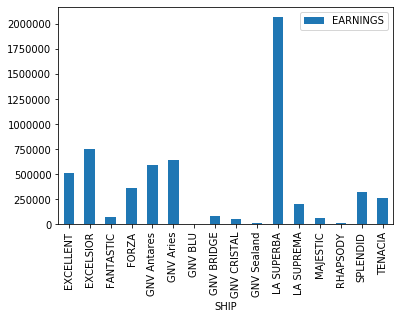

In [23]:
earnings_by_ship = pd.pivot_table(positive_quantity_df, index=['SHIP'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_ship.plot.bar()

<h2>Earnings By Month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

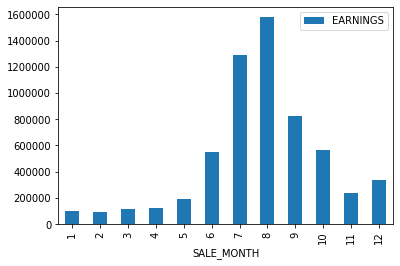

In [24]:
earnings_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_month.plot.bar()

<h2>Top sellers of each month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

In [25]:
groupby_quantity = positive_quantity_df.groupby(['SALE_MONTH','ITEM_CATEGORY']).agg({'QUANTITY':sum})
groupby_month = groupby_quantity['QUANTITY'].groupby('SALE_MONTH', group_keys=False)
groupby_month.nlargest(3)


SALE_MONTH  ITEM_CATEGORY         
1           CAFFE'                    20633
            PANE E COPERTO PASTI      11910
            CONTORNO                  10446
2           CAFFE'                    21689
            PANE E COPERTO PASTI      13206
                                      ...  
11          PANE E COPERTO PASTI      18818
            CROISSANTS E BREAKFAST    16783
12          CAFFE'                    41241
            PANE E COPERTO PASTI      21818
            CROISSANTS E BREAKFAST    21121
Name: QUANTITY, Length: 36, dtype: int64

In [209]:
testdf = positive_quantity_df.copy()
mapping = {}
for i in range(1,12):
    if(i<3):
        mapping[i]='Winter'
    elif(i>=3 and i<6):
        mapping[i]='Spring'
    elif(i>=6 and i <9):
        mapping[i]='Summer'
    else:
        mapping[i]='Autumn'
mapping[12]='Winter'
testdf['Seasons']= testdf['SALE_MONTH'].map(mapping)
testdf.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum})




QUANTITY
Seasons MENU_CATEGORY          
Autumn  ALCOHOL           62181
        CORRECTION         1193
        FOOD             554480
        SOFT DRINK       364674
Spring  ALCOHOL           29824
        CORRECTION          980
        FOOD             299546
        SOFT DRINK       178256
Summer  ALCOHOL          101044
        CORRECTION         1579
        FOOD             864819
        SOFT DRINK       644677
Winter  ALCOHOL           25796
        CORRECTION          776
        FOOD             296348
        SOFT DRINK       176820

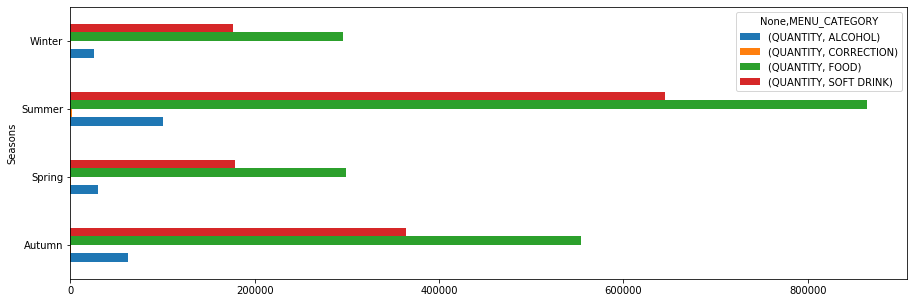

In [210]:
testdf.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum}).unstack(1).plot.barh(figsize=(15,5))



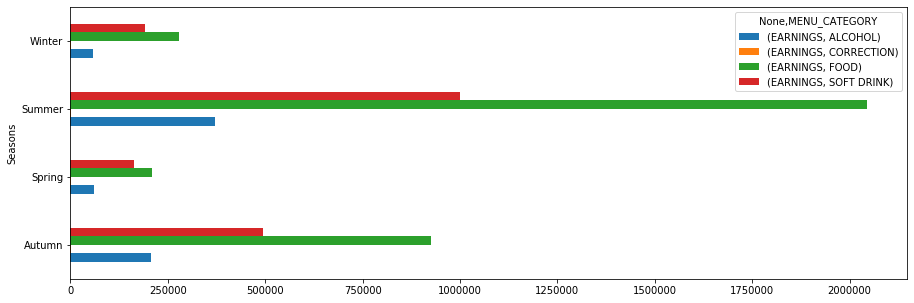

In [211]:

testdf.groupby(['Seasons','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))

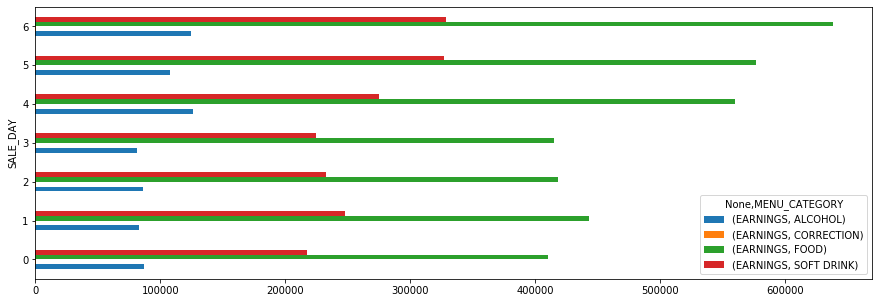

In [237]:

testdf["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
testdf.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))


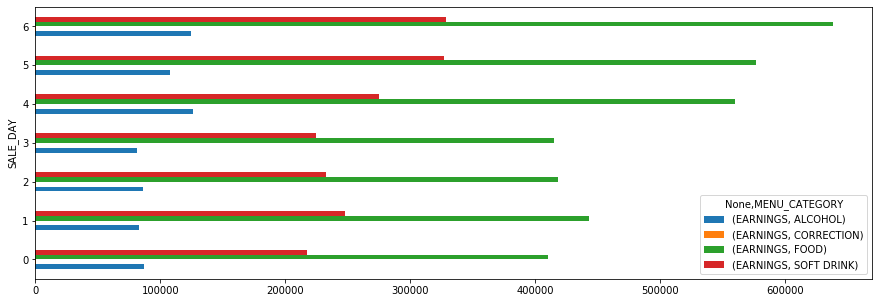

In [244]:
testdf["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
testdf.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':'sum'},{'EARNINGS':'mean'}).unstack(1).plot.barh(figsize=(15,5))


In [ ]:
# testdf[(testdf['BILL_NUMBER']==5) & (testdf['POINT_OF_SALE_LOCATION']== 'EXT SELF Passeggeri') & (testdf['BILL_TIME']== 123104) & (testdf['SALE_DAY']==5)]
for i in testdf['POINT_OF_SALE_LOCATION'].unique():
    for j in testdf[testdf['POINT_OF_SALE_LOCATION'] == i]['BILL_NUMBER'].unique():
        print(testdf[(testdf['POINT_OF_SALE_LOCATION'] == i) & (testdf['BILL_NUMBER'] == j)]['ITEM'].tolist)

